# Simple Recommender
Para começarmos a entender os sistemas de recomendação, vamos usar como base de comparação a lista de 250 filmes do IMDB, calculados segundo uma métrica específica. Todos os filmes na lista são não-documentário, lançamento de cinema, possui pelo menos 45 minutos e tem mais de 250000 avaliações.

Você pode consultar essa lista [aqui](https://www.imdb.com/chart/top/)

Como vimos, isso é um tipo de recomendação. Vamos usar o data set The Movies Dataset link para criar uma lista parecida a fim de oferencer uma recomendação inicial.

Link para download dos dados: [link](https://drive.google.com/drive/folders/12y6Wa9D4X1pQhCOnGE2DOGvmOvFijv8u)

In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('../../data/bases_disciplina_2/movies_metadata.csv')

C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1372573272.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/bases_disciplina_2/movies_metadata.csv')


In [95]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Para construir esse simples recommender, vamos seguir os seguintes passos:

1. Escolher uma métrica para avaliar os filmes
2. Decidir os pré-requisitos para o filme fazer parte da lista
3. Calcular o score para cada filme de acordo com a métrica e os pré-requisitos
4. Retornar a lista de filmes em ordem decrescente de acordo com o score

## Métrica: Weighted Rating

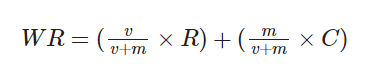

- v = número de votos (vote_count)
- m = mínimo de votos para participar do ranking
- R = rating médio do filme (vote_average)
- C = rating médio de todos os filmes

In [96]:
df[['title','vote_count','vote_average']]

,title,vote_count,vote_average
0,Toy Story,5415.0,7.7
1,Jumanji,2413.0,6.9
2,Grumpier Old Men,92.0,6.5
3,Waiting to Exhale,34.0,6.1
4,Father of the Bride Part II,173.0,5.7
...,...,...,...
45461,Subdue,1.0,4.0
45462,Century of Birthing,3.0,9.0
45463,Betrayal,6.0,3.8
45464,Satan Triumphant,0.0,0.0


## Cálculo m

In [97]:
# Será utilizado o quantil 0.8 para definir valor mínimo de votos para o filme entrar no ranking
m = int(df['vote_count'].quantile(0.8))
print(f'Mínimo de votos: {m}')

Mínimo de votos: 50


## Cálculo C

In [98]:
C = df['vote_average'].mean()
print(f'Média: {C}')

Média: 5.618207215134185


## Outros requisitos básicos

In [99]:
# Tempo de duração + número de votos
min_time = 30
max_time = 500

filtered_df = df.query('runtime > 30 and runtime < 500 and vote_count >= @m')
print(f'Total de filmes elegíveis: {len(filtered_df)}')

Total de filmes elegíveis: 8990


## Função final

In [100]:
def calculate_weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [101]:
filtered_df['score'] = filtered_df.apply(calculate_weighted_rating, axis=1)
filtered_df.sort_values(by='score', ascending=False, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1760808176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['score'] = filtered_df.apply(calculate_weighted_rating, axis=1)
C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1760808176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='score', ascending=False, inplace=True)


In [102]:
filtered_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
0,False,NaN,13200000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,19404,tt0112870,hi,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",...,1.000000e+08,190.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Come... Fall In Love,Dilwale Dulhania Le Jayenge,False,9.1,661.0,8.855148
1,False,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,2.834147e+07,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0,8.482863
2,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,2.450664e+08,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,8.476278
3,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",https://www.funimationfilms.com/movie/yourname/,372058,tt5311514,ja,君の名は。,High schoolers Mitsuha and Taki are complete s...,...,3.552983e+08,106.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Your Name.,False,8.5,1030.0,8.366584
4,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.289115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,False,"{'id': 225961, 'name': 'Birdemic Collection', ...",0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://www.birdemic.com/,40016,tt1316037,en,Birdemic: Shock and Terror,A platoon of eagles and vultures attacks the r...,...,0.000000e+00,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why did the eagles and vultures attack?,Birdemic: Shock and Terror,False,2.1,69.0,3.578238
8986,False,NaN,25000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.disastermovie.net/,13805,tt1213644,en,Disaster Movie,"In DISASTER MOVIE, the filmmaking team behind ...",...,1.410928e+07,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your favorite movies are going to be destroyed.,Disaster Movie,False,3.1,250.0,3.519701
8987,False,NaN,20000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9760,tt0799949,en,Epic Movie,"When Edward, Peter, Lucy and Susan each follow...",...,8.686556e+07,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,We know it's big. We measured.,Epic Movie,False,3.2,334.0,3.514871
8988,False,NaN,44000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,5491,tt0185183,en,Battlefield Earth,"In the year 3000, man is no match for the Psyc...",...,2.140000e+07,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Take Back The Planet,Battlefield Earth,False,3.0,259.0,3.423658


In [103]:
#Imprime os top 25 filmes
filtered_df[['title', 'vote_count', 'vote_average', 'score', 'runtime']].head(25)

,title,vote_count,vote_average,score,runtime
0,Dilwale Dulhania Le Jayenge,661.0,9.1,8.855148,190.0
1,The Shawshank Redemption,8358.0,8.5,8.482863,142.0
2,The Godfather,6024.0,8.5,8.476278,175.0
3,Your Name.,1030.0,8.5,8.366584,106.0
4,The Dark Knight,12269.0,8.3,8.289115,152.0
5,Fight Club,9678.0,8.3,8.286216,139.0
6,Pulp Fiction,8670.0,8.3,8.284623,154.0
7,Schindler's List,4436.0,8.3,8.270109,195.0
8,Whiplash,4376.0,8.3,8.269704,105.0
9,Spirited Away,3968.0,8.3,8.266628,125.0


Obviamente que esse não é um tipo de recomendação personalizada. Ele apenas leva em conta as maiores notas que cada filme presente na base recebeu. A premissa é que, se muitas pessoas assistiram e gostaram, talvez seja uma boa você assistir também.

Vamos agora ver outro tipo de sistema de recomendação que já leva em consideração as preferências do usuário.

# Knowledge-based recommender

Vamos avançar um pouco e criar um sistema um pouco mais complexo para fazer recomendações. Vamos realizar essas tarefas:

- Perguntar ao usuário seus gêneros preferidos
- Perguntar ao usuário a duração do filme
- Perguntar ao usuário a linha do tempo de filmes recomendados

Usando essas informações coletadas, recomende filmes ao usuário que possuam um alto score e que satisfaça as condições anteriores

In [104]:
df_knowledge = filtered_df[['id','title','genres','release_date','runtime','vote_count','vote_average']]
df_knowledge.head()

,id,title,genres,release_date,runtime,vote_count,vote_average
0,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-10-20,190.0,661.0,9.1
1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1994-09-23,142.0,8358.0,8.5
2,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1972-03-14,175.0,6024.0,8.5
3,372058,Your Name.,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",2016-08-26,106.0,1030.0,8.5
4,155,The Dark Knight,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",2008-07-16,152.0,12269.0,8.3


## Coluna com ano de lançamento

In [105]:
def get_year(x):
    try:
        return int(x)
    except:
        return 0

In [106]:
df_knowledge['release_year'] = pd.to_datetime(df_knowledge['release_date'], format='%Y-%m-%d', errors='coerce').dt.year
df_knowledge['release_year'] = df_knowledge['release_year'].apply(lambda x: get_year(x))
df_knowledge.drop(columns=['release_date'], inplace=True)
df_knowledge.head()

C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1423087345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knowledge['release_year'] = pd.to_datetime(df_knowledge['release_date'], format='%Y-%m-%d', errors='coerce').dt.year
C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1423087345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knowledge['release_year'] = df_knowledge['release_year'].apply(lambda x: get_year(x))
C:\Users\Jackson Simionato\AppData\Local\Temp\ipykern

,id,title,genres,runtime,vote_count,vote_average,release_year
0,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",190.0,661.0,9.1,1995
1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",142.0,8358.0,8.5,1994
2,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",175.0,6024.0,8.5,1972
3,372058,Your Name.,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",106.0,1030.0,8.5,2016
4,155,The Dark Knight,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",152.0,12269.0,8.3,2008


## Coluna de gênero

In [107]:
# Coluna possui dicionário de generos para o mesmo filme
df_knowledge['genres']

0       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
1       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
2       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
3       [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...
4       [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...
                              ...                        
8985    [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...
8986    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
8987    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
8988    [{'id': 28, 'name': 'Action'}, {'id': 878, 'na...
8989    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, Length: 8990, dtype: object

In [108]:
# Dicionário/JSON está em formato string. Precisa ser convertido
print(type(df_knowledge.loc[0,'genres']))

<class 'str'>


In [109]:
from ast import literal_eval

In [110]:
print(literal_eval(df_knowledge.loc[0,'genres']))
print(type(literal_eval(df_knowledge.loc[0,'genres'])))

[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
<class 'list'>


In [111]:
df_knowledge['genres'].fillna('[]')
df_knowledge['genres'] = df_knowledge['genres'].apply(literal_eval)
df_knowledge['genres']

C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\3378354036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knowledge['genres'] = df_knowledge['genres'].apply(literal_eval)


0       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
1       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
2       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
3       [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...
4       [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...
                              ...                        
8985    [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...
8986    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
8987    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
8988    [{'id': 28, 'name': 'Action'}, {'id': 878, 'na...
8989    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
Name: genres, Length: 8990, dtype: object

In [112]:
# Lista de dicionários contendo nome dos gêneros
for dicionario in df_knowledge.loc[0,'genres']:
    print(dicionario['name'])

Comedy
Drama
Romance


In [113]:
def get_genres(x):
    return x['name'].lower()

In [114]:
df_knowledge['genres'] = df_knowledge['genres'].apply(lambda x: [get_genres(i) for i in x])

C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1640385606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knowledge['genres'] = df_knowledge['genres'].apply(lambda x: [get_genres(i) for i in x])


## Explode com base nos generos de cada filme

In [115]:
df_knowledge

,id,title,genres,runtime,vote_count,vote_average,release_year
0,19404,Dilwale Dulhania Le Jayenge,"[comedy, drama, romance]",190.0,661.0,9.1,1995
1,278,The Shawshank Redemption,"[drama, crime]",142.0,8358.0,8.5,1994
2,238,The Godfather,"[drama, crime]",175.0,6024.0,8.5,1972
3,372058,Your Name.,"[romance, animation, drama]",106.0,1030.0,8.5,2016
4,155,The Dark Knight,"[drama, action, crime, thriller]",152.0,12269.0,8.3,2008
...,...,...,...,...,...,...,...
8985,40016,Birdemic: Shock and Terror,"[horror, science fiction]",95.0,69.0,2.1,2010
8986,13805,Disaster Movie,"[action, comedy]",87.0,250.0,3.1,2008
8987,9760,Epic Movie,"[action, adventure, comedy]",86.0,334.0,3.2,2007
8988,5491,Battlefield Earth,"[action, science fiction, war]",118.0,259.0,3.0,2000


In [116]:
df_knowledge_exploded = df_knowledge.explode('genres')
df_knowledge_exploded.rename(columns={'genres':'genre'}, inplace=True)
df_knowledge_exploded.reset_index(drop=True, inplace=True)
df_knowledge_exploded

,id,title,genre,runtime,vote_count,vote_average,release_year
0,19404,Dilwale Dulhania Le Jayenge,comedy,190.0,661.0,9.1,1995
1,19404,Dilwale Dulhania Le Jayenge,drama,190.0,661.0,9.1,1995
2,19404,Dilwale Dulhania Le Jayenge,romance,190.0,661.0,9.1,1995
3,278,The Shawshank Redemption,drama,142.0,8358.0,8.5,1994
4,278,The Shawshank Redemption,crime,142.0,8358.0,8.5,1994
...,...,...,...,...,...,...,...
22752,14164,Dragonball Evolution,action,85.0,475.0,2.9,2009
22753,14164,Dragonball Evolution,adventure,85.0,475.0,2.9,2009
22754,14164,Dragonball Evolution,fantasy,85.0,475.0,2.9,2009
22755,14164,Dragonball Evolution,science fiction,85.0,475.0,2.9,2009


## Função final

Agora estamos prontos para criar uma função que irá agir como nosso recommender. Vamos criar os seguintes passos:

- Obter o input do usuário sobre suas preferências
- Extrair todos os filmes que dão match com as condições do usuário
- Calcular rating e mostrar filmes

In [117]:
def build_chart(gen_df, percentile=0.8):
    
    print("Diga seu gênero preferido:")
    genre = input()

    print("Duração mínima:")
    low_time = int(input())
    
    print("Duração máxima:")
    high_time = int(input())

    print("Ano de lançamento mínimo")
    low_year = int(input())

    print("Ano de lançamento máximo")
    high_year = int(input())
    
    #Cria uma nova variável
    movies = gen_df.copy()
    
    #Filtra os filmes baseados nas condições fornecidas
    movies = movies[(movies['genre'] == genre) & 
                    (movies['runtime'] >= low_time) & 
                    (movies['runtime'] <= high_time) & 
                    (movies['release_year'] >= low_year) & 
                    (movies['release_year'] <= high_year)]
    
    #Calcula o valor de C e m
    C = movies['vote_average'].mean()
    m = movies['vote_count'].quantile(percentile)
    
    #considera apenas filmes com mais que m votos
    q_movies = movies.copy().loc[movies['vote_count'] >= m]
    
    #Calcula o score
    #q_movies['score'] = q_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) 
    #                                   + (m/(m+x['vote_count']) * C)
    #                                   ,axis=1)

    q_movies['score'] = q_movies.apply(calculate_weighted_rating, axis=1)

    #Ordena os filmes de maneira descendente
    q_movies = q_movies.sort_values('score', ascending=False)
    
    return q_movies

In [118]:
#build_chart(df_knowledge_exploded)

In [119]:
#salvando os dados para serem usados posteriormente
df_knowledge_exploded.to_csv('../../data/bases_disciplina_2/metadata_clean.csv', index=False)

# Recommender baseado na descrição de filmes

Compara descrição de filmes e recomenda filmes com descrições similares

Basicamente, nosso modelo irá receber o título do filme como argumento e retornar uma lista de filmes similares baseada na descrição. Estes são os passos que vamos executar para construir nosso modelo:

1. Obter os dados requeridos para construir o modelo
2. Criar vetorização usando TF-IDF para cada filme
3. Calcular a similaridade do cosseno par-a-par para cada filme
4. Escrever uma função que recebe um título de filme como entrada e retorna uma lista de filmes similares

In [120]:
df_description = pd.read_csv('../../data/bases_disciplina_2/movies_metadata.csv')

C:\Users\Jackson Simionato\AppData\Local\Temp\ipykernel_22240\1093260647.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_description = pd.read_csv('../../data/bases_disciplina_2/movies_metadata.csv')


In [121]:
keep_cols = [col for col in df_knowledge.columns if col in df_description.columns]
keep_cols.append('overview')

In [122]:
df_description = df_description[keep_cols]
df_description

,id,title,genres,runtime,vote_count,vote_average,overview
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,5415.0,7.7,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,2413.0,6.9,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,92.0,6.5,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,34.0,6.1,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,173.0,5.7,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...
45461,439050,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,1.0,4.0,Rising and falling between a man and woman.
45462,111109,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",360.0,3.0,9.0,An artist struggles to finish his work while a...
45463,67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,6.0,3.8,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,[],87.0,0.0,0.0,"In a small town live two brothers, one a minis..."


In [123]:
#Adiciona as informações necessárias no nosso dataseet
df_description['overview'].fillna('', inplace=True)
df_description

,id,title,genres,runtime,vote_count,vote_average,overview
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,5415.0,7.7,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,2413.0,6.9,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,92.0,6.5,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,34.0,6.1,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,173.0,5.7,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...
45461,439050,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,1.0,4.0,Rising and falling between a man and woman.
45462,111109,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",360.0,3.0,9.0,An artist struggles to finish his work while a...
45463,67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,6.0,3.8,"When one of her hits goes wrong, a professiona..."
45464,227506,Satan Triumphant,[],87.0,0.0,0.0,"In a small town live two brothers, one a minis..."


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
# Criação da matriz tfidf. Similaridade é muito pesada para processar, será feito com apenas 10k filmes
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df_description['overview'][:15000])
print(tfidf_matrix.shape)
print(tfidf_matrix[0])

(15000, 40226)
  (0, 9919)	0.13987951816234856
  (0, 2375)	0.1565860102598604
  (0, 20568)	0.10444062964633988
  (0, 12244)	0.10298760937148467
  (0, 11017)	0.13655813659517643
  (0, 25995)	0.10274174243476022
  (0, 31967)	0.13528698590090277
  (0, 6748)	0.13023057463399038
  (0, 27389)	0.13528698590090277
  (0, 16183)	0.10619934565034038
  (0, 27272)	0.09619428909784275
  (0, 21345)	0.12217941008704057
  (0, 1080)	0.15139852451886696
  (0, 31454)	0.11743456929649247
  (0, 20936)	0.19148594171249847
  (0, 5331)	0.5017865301247972
  (0, 4889)	0.11073738607329742
  (0, 3991)	0.12726642190831167
  (0, 30621)	0.11794829577381227
  (0, 15908)	0.13296288271306822
  (0, 21105)	0.09187007396582393
  (0, 36574)	0.15910427524991266
  (0, 1739)	0.4228161082265845
  (0, 39518)	0.45419557355660084
  (0, 20600)	0.11014031375462982


In [126]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [127]:
indices = pd.Series(df_description.index, index=df_description['title']).drop_duplicates()
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
Century of Birthing            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45466, dtype: int64

In [128]:
def content_recommender_2(title, cosine_sim=cosine_similarity, df=df_description, indices=indices):
    # obtém o índice do filme dado o título 
    idx = indices[title]

    # obtém o score de similaridade par a par de todos os filmes com o filme em questão
    # e converte numa lista de tuplas
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena os filmes baseados na similaridade do cosseno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtém o score dos dez mais similares, ignorando o primeiro(próprio filme).
    sim_scores = sim_scores[1:11]

    # Obtém o índice dos filmes
    movie_indices = [i[0] for i in sim_scores]

    # Retorna o título dos 10 mais similares
    return df['title'].iloc[movie_indices]

In [172]:
def content_recommender(title, cosine_similarity=cosine_similarity, df=df_description, indices=indices):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_similarity[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Top 10 exceto o 1 que é ele mesmo
    sim_scores = sim_scores[1:11]

    movie_idx = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_idx]

In [171]:
content_recommender('The Matrix')

167                       Hackers
6515                     Commando
9159                     Takedown
10815                       Pulse
9372                The Animatrix
10948                          23
13887        The Inhabited Island
7897             Freedom Downtime
14551                      Avatar
12818    War Games: The Dead Code
Name: title, dtype: object

# Recommender baseado em metadados

Basicamente, vamos seguir os mesmos passos na criação de nosso recommender. Entretanto, os dados a serem usados serão diferentes. Basicamente, vamos usar os seguintes metadados:

1. Gênero do filme
2. Diretor do filme
3. Três maiores estrelas do filme
4. Sub-gêneros ou keywords

In [193]:
df_credits = pd.read_csv('../../data/bases_disciplina_2/credits.csv')
df_keywords = pd.read_csv('../../data/bases_disciplina_2/keywords.csv')

In [194]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [195]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [196]:
df_keywords.iloc[0,:]['keywords']

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [197]:
df_credits.iloc[0,:]['cast']

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

Dicionários representados como strings. Novamente precisamos convertê-los para objetos python

## Merge Keywords e Créditos

In [198]:
# Função para ajustar IDs no formato errado
def clean_id(x):
    try:
        return int(x)
    except:
        return np.nan

In [199]:
df_credits['id'] = df_credits['id'].apply(clean_id)
df_keywords['id'] = df_keywords['id'].apply(clean_id)
df_description['id'] = df_description['id'].apply(clean_id)

In [200]:
# Filtro de linhas com ID NaN{}
df_credits = df_credits.loc[df_credits['id'].isna() == False]
df_keywords = df_keywords.loc[df_keywords['id'].isna() == False]

In [201]:
df_description

,id,title,genres,runtime,vote_count,vote_average,overview
0,862.0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,5415.0,7.7,"Led by Woody, Andy's toys live happily in his ..."
1,8844.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,2413.0,6.9,When siblings Judy and Peter discover an encha...
2,15602.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,92.0,6.5,A family wedding reignites the ancient feud be...
3,31357.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,34.0,6.1,"Cheated on, mistreated and stepped on, the wom..."
4,11862.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,173.0,5.7,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...
45461,439050.0,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,1.0,4.0,Rising and falling between a man and woman.
45462,111109.0,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",360.0,3.0,9.0,An artist struggles to finish his work while a...
45463,67758.0,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,6.0,3.8,"When one of her hits goes wrong, a professiona..."
45464,227506.0,Satan Triumphant,[],87.0,0.0,0.0,"In a small town live two brothers, one a minis..."


In [202]:
df_metadata_recommender = df_description.merge(df_keywords, on='id')
df_metadata_recommender = df_metadata_recommender.merge(df_credits, on='id')

In [203]:
# DF mergeado com informações de descrição, cast e crew
df_metadata_recommender

,id,title,genres,runtime,vote_count,vote_average,overview,keywords,cast,crew
0,862.0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,5415.0,7.7,"Led by Woody, Andy's toys live happily in his ...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,2413.0,6.9,When siblings Judy and Peter discover an encha...,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,92.0,6.5,A family wedding reignites the ancient feud be...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,34.0,6.1,"Cheated on, mistreated and stepped on, the wom...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,173.0,5.7,Just when George Banks has recovered from his ...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...
46623,439050.0,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,1.0,4.0,Rising and falling between a man and woman.,"[{'id': 10703, 'name': 'tragic love'}]","[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
46624,111109.0,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",360.0,3.0,9.0,An artist struggles to finish his work while a...,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,...","[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
46625,67758.0,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,6.0,3.8,"When one of her hits goes wrong, a professiona...",[],"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
46626,227506.0,Satan Triumphant,[],87.0,0.0,0.0,"In a small town live two brothers, one a minis...",[],"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


## Transformações

Agora que temos todas as features num único Dataframe, vamos transformá-las num formáto útil. Especificamente, essas são as transformações que iremos executar:

- Converter keywords numa lista de string (vamos inclur somente as top 3)
- Converter cast numa lista de string (vamos incluir somente as top 3)
- De crew, vamos recuperar somente o diretor

### Dicionarios para objetos python

In [204]:
# Novamente iremos aplicar a função literal_eval
cols_transform = ['cast','crew','genres','keywords']

for col in cols_transform:
    df_metadata_recommender[col] = df_metadata_recommender[col].apply(literal_eval) 

In [205]:
type(df_metadata_recommender.iloc[0]['cast'])

list

### Coluna diretor

In [206]:
# chave 'job' indica se é diretor
df_metadata_recommender.iloc[0]['crew']

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [207]:
# Função para obter diretor da coluna crew
def get_director(x):
    for crew_member in x:
        if crew_member['job'] == 'Director':
            return crew_member['name']
    return np.nan

In [208]:
df_metadata_recommender['director'] = df_metadata_recommender['crew'].apply(get_director)
df_metadata_recommender.head()

,id,title,genres,runtime,vote_count,vote_average,overview,keywords,cast,crew,director
0,862.0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,5415.0,7.7,"Led by Woody, Andy's toys live happily in his ...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,8844.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,2413.0,6.9,When siblings Judy and Peter discover an encha...,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,15602.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,92.0,6.5,A family wedding reignites the ancient feud be...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,31357.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,34.0,6.1,"Cheated on, mistreated and stepped on, the wom...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,11862.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,173.0,5.7,Just when George Banks has recovered from his ...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


### Três principais atores

In [209]:
# Exemplo de 3 principais atores do cast de um filme
df_metadata_recommender.iloc[0]['cast'][:3]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}]

In [210]:
def get_top_metadata(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]

        if len(names) > 3:
            names = names[:3]
        return names
    else:
        return []

In [211]:
# APlicação da função nas colunas keywords, cast e genres
df_metadata_recommender['cast'] = df_metadata_recommender['cast'].apply(get_top_metadata)
df_metadata_recommender['keywords'] = df_metadata_recommender['keywords'].apply(get_top_metadata)
df_metadata_recommender['genres'] = df_metadata_recommender['genres'].apply(get_top_metadata)

In [212]:
df_metadata_recommender[['id','title','genres','keywords','cast','director']]

,id,title,genres,keywords,cast,director
0,862.0,Toy Story,"[Animation, Comedy, Family]","[jealousy, toy, boy]","[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
1,8844.0,Jumanji,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
2,15602.0,Grumpier Old Men,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger]","[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch
3,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker
4,11862.0,Father of the Bride Part II,[Comedy],"[baby, midlife crisis, confidence]","[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer
...,...,...,...,...,...,...
46623,439050.0,Subdue,"[Drama, Family]",[tragic love],"[Leila Hatami, Kourosh Tahami, Elham Korda]",Hamid Nematollah
46624,111109.0,Century of Birthing,[Drama],"[artist, play, pinoy]","[Angel Aquino, Perry Dizon, Hazel Orencio]",Lav Diaz
46625,67758.0,Betrayal,"[Action, Drama, Thriller]",[],"[Erika Eleniak, Adam Baldwin, Julie du Page]",Mark L. Lester
46626,227506.0,Satan Triumphant,[],[],"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",Yakov Protazanov


### Tratamento de strings

Por último, precisamos criar uma função simples para preparar esses textos. Vamos remover os espaços em branco dos nomes de cast e director (de modo que Ryan Reynolds e Ryan Gosling sejam tratados de forma diferente) e colocar todos os textos em minúsculas.

In [213]:
def clean_text(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ','')) for i in x]
    elif isinstance(x, str):
        return str.lower(x.replace(' ', ''))
    else:
        return ''

In [214]:
df_metadata_recommender_copy = df_metadata_recommender.copy()

In [215]:
cols_transform = ['cast', 'director', 'genres', 'keywords']

In [216]:
for col in cols_transform:
    df_metadata_recommender[col] = df_metadata_recommender[col].apply(clean_text)

In [217]:
df_metadata_recommender[['id','title','genres','keywords','cast','director']]

,id,title,genres,keywords,cast,director
0,862.0,Toy Story,"[animation, comedy, family]","[jealousy, toy, boy]","[tomhanks, timallen, donrickles]",johnlasseter
1,8844.0,Jumanji,"[adventure, fantasy, family]","[boardgame, disappearance, basedonchildren'sbook]","[robinwilliams, jonathanhyde, kirstendunst]",joejohnston
2,15602.0,Grumpier Old Men,"[romance, comedy]","[fishing, bestfriend, duringcreditsstinger]","[waltermatthau, jacklemmon, ann-margret]",howarddeutch
3,31357.0,Waiting to Exhale,"[comedy, drama, romance]","[basedonnovel, interracialrelationship, single...","[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker
4,11862.0,Father of the Bride Part II,[comedy],"[baby, midlifecrisis, confidence]","[stevemartin, dianekeaton, martinshort]",charlesshyer
...,...,...,...,...,...,...
46623,439050.0,Subdue,"[drama, family]",[tragiclove],"[leilahatami, kouroshtahami, elhamkorda]",hamidnematollah
46624,111109.0,Century of Birthing,[drama],"[artist, play, pinoy]","[angelaquino, perrydizon, hazelorencio]",lavdiaz
46625,67758.0,Betrayal,"[action, drama, thriller]",[],"[erikaeleniak, adambaldwin, juliedupage]",markl.lester
46626,227506.0,Satan Triumphant,[],[],"[iwanmosschuchin, nathalielissenko, pavelpavlov]",yakovprotazanov


In [218]:
# Por fim, as colunas serão concatenadas em uma única string
def concat_str_columns(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' +x['director'] + ' ' + ' '.join(x['genres'])

In [219]:
df_metadata_recommender['feature'] = df_metadata_recommender.apply(concat_str_columns, axis=1)

In [220]:
df_metadata_recommender.head()

,id,title,genres,runtime,vote_count,vote_average,overview,keywords,cast,crew,director,feature
0,862.0,Toy Story,"[animation, comedy, family]",81.0,5415.0,7.7,"Led by Woody, Andy's toys live happily in his ...","[jealousy, toy, boy]","[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",johnlasseter,jealousy toy boy tomhanks timallen donrickles ...
1,8844.0,Jumanji,"[adventure, fantasy, family]",104.0,2413.0,6.9,When siblings Judy and Peter discover an encha...,"[boardgame, disappearance, basedonchildren'sbook]","[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",joejohnston,boardgame disappearance basedonchildren'sbook ...
2,15602.0,Grumpier Old Men,"[romance, comedy]",101.0,92.0,6.5,A family wedding reignites the ancient feud be...,"[fishing, bestfriend, duringcreditsstinger]","[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",howarddeutch,fishing bestfriend duringcreditsstinger walter...
3,31357.0,Waiting to Exhale,"[comedy, drama, romance]",127.0,34.0,6.1,"Cheated on, mistreated and stepped on, the wom...","[basedonnovel, interracialrelationship, single...","[whitneyhouston, angelabassett, lorettadevine]","[{'credit_id': '52fe44779251416c91011acb', 'de...",forestwhitaker,basedonnovel interracialrelationship singlemot...
4,11862.0,Father of the Bride Part II,[comedy],106.0,173.0,5.7,Just when George Banks has recovered from his ...,"[baby, midlifecrisis, confidence]","[stevemartin, dianekeaton, martinshort]","[{'credit_id': '52fe44959251416c75039ed7', 'de...",charlesshyer,baby midlifecrisis confidence stevemartin dian...


## Aplicação do modelo

In [246]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_metadata_recommender['feature'][:20000]) #se der problema de memória, reduza a quantidade de linhas: df['feature'][0:30000]

In [247]:
#calcula a similaridade par a par
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [248]:
df_metadata_recommender = df_metadata_recommender.reset_index()

In [249]:
df_metadata_recommender.dropna(subset=['title'], inplace=True)
df_metadata_recommender.drop_duplicates(subset=['title'],inplace=True)
df_metadata_recommender.reset_index(drop=True, inplace=True)

In [250]:
df_metadata_recommender['feature'][:40000]

0        jealousy toy boy tomhanks timallen donrickles ...
1        boardgame disappearance basedonchildren'sbook ...
2        fishing bestfriend duringcreditsstinger walter...
3        basedonnovel interracialrelationship singlemot...
4        baby midlifecrisis confidence stevemartin dian...
                               ...                        
39995    witch magic magicalgirl megumihan fumikoorikas...
39996     mayosuzukaze junkoiwao nozomusasaki kazuhirof...
39997    summercamp slasher pamelaspringsteen renéeeste...
39998     harrysecombe spikemilligan petersellers antho...
39999     markburns beatieedney petersellers simonheser...
Name: feature, Length: 40000, dtype: object

In [251]:
df_metadata_recommender.loc[df_metadata_recommender['title'] =='In Her Line of Fire']

,level_0,index,id,title,genres,runtime,vote_count,vote_average,overview,keywords,cast,crew,director,feature
36234,36234,39999,56491.0,In Her Line of Fire,"[action, thriller]",88.0,9.0,3.3,When the Vice President's plane goes down near...,"[rebel, usapresident, hostage]","[marielhemingway, davidkeith, davidmillbern]","[{'credit_id': '52fe4902c3a36847f8184ed1', 'de...",briantrenchard-smith,rebel usapresident hostage marielhemingway dav...


In [252]:
indices_metadata = pd.Series(df_metadata_recommender.index, index=df_metadata_recommender['title'])
indices_metadata

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Caged Heat 3000                42271
Subdue                         42272
Century of Birthing            42273
Satan Triumphant               42274
Queerama                       42275
Length: 42276, dtype: int64

In [253]:
def content_recommender(title, cosine_similarity=cosine_similarity, df=df_description, indices=indices):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_similarity[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Top 10 exceto o 1 que é ele mesmo
    sim_scores = sim_scores[1:11]

    movie_idx = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_idx]

def content_recommender(title, cosine_sim, df, indices):
    # obtém o índice do filme dado o título 
    idx = indices[title]

    # obtém o score de similaridade par a par de todos os filmes com o filme em questão
    # e converte numa lista de tuplas
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena os filmes baseados na similaridade do cosseno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtém o score dos dez mais similares, ignorando o primeiro(próprio filme).
    sim_scores = sim_scores[1:11]

    # Obtém o índice dos filmes
    movie_indices = [i[0] for i in sim_scores]

    # Retorna o título dos 10 mais similares
    return df['title'].iloc[movie_indices]

In [258]:
content_recommender('Showgirls', cosine_sim2, df_metadata_recommender, indices_metadata)

1058                 Basic Instinct
1624               Ill Gotten Gains
3424     Jails, Hospitals & Hip-Hop
19416                       Sundome
11347                     Damnation
4728                   Katie Tippel
1398                          Touch
9056                        Miranda
18807                Stockholm East
819                      Lotto Land
Name: title, dtype: object